In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
CMT = pd.read_csv('CMT_Rates.csv')
CMT['Date'] = pd.to_datetime(CMT['Date'], format='%y/%m/%d')
CMT.set_index('Date',inplace=True)
CMT = CMT.dropna()
CMT.head()

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2012-01-03,0.01,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
2012-01-04,0.01,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
2012-01-05,0.01,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
2012-01-06,0.02,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
2012-01-09,0.01,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02


In [10]:
# sample from 2012 to 2016
CMT_sample1 = CMT['2012-01-01':'2016-12-31']
CMT_sample1.head()

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2012-01-03,0.01,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
2012-01-04,0.01,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
2012-01-05,0.01,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
2012-01-06,0.02,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
2012-01-09,0.01,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02


# Problem 1

### Step 1: Assume a value of , and t 1(t); 2(t); 3(t) to a set of yields observed on day t

In [51]:
def alpha(x,y):
    return (1-np.exp(-x*y)) / (x*y)

def Nelson_Siegel(param,b0,b1,b2): # set a vector of parameters of tau and lambda, better use of curve_fit
    tau, lamb = param
    return b0 + b1*alpha(tau,lamb) + b2*(alpha(tau,lamb)-np.exp(-lamb*tau))

In [56]:
from scipy.optimize import curve_fit

def DNS(data, mat_vec, lamb_vec):
    best_b = []
    cmt_model = []
    for i in range(data.shape[0]):
        best_est, cov = curve_fit(Nelson_Siegel, [mat_vec,lamb_vec], data.iloc[i,:], p0=initial_b)
        best_b.append(best_est)
        lamb = lamb_vec[0]
        cmt_model.append([Nelson_Siegel([tau,lamb], best_est[0], best_est[1], best_est[2]) for tau in mat_vec])
    return best_b, cmt_model

In [62]:
mat_vec = [1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30] # maturity vector
lamb_vec = [0.1 for i in range(len(mat_vec))] # set lambda as 0.1
initial_b = [0,0,0]

beta, CMT_model = DNS(CMT_sample1, mat_vec, lamb_vec)
beta_matrix = pd.DataFrame(beta, index=CMT_sample1.index, columns=['beta0','beta1','beta2'])
CMT_model_matrix = pd.DataFrame(CMT_model, index=CMT_sample1.index, columns=CMT_sample1.columns)

In [63]:
beta_matrix.head()

,beta0,beta1,beta2
Date,,,
2012-01-03,3.872604,-4.004978,1.645346
2012-01-04,3.967429,-4.105687,1.605990
2012-01-05,4.046390,-4.183418,1.532385
2012-01-06,4.033128,-4.167265,1.413038
2012-01-09,4.049046,-4.189937,1.386334


In [64]:
CMT_model_matrix.head()

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2012-01-03,-0.108915,-0.062499,0.005891,0.138347,0.386866,0.615123,1.017766,1.358588,1.775744,2.629786,3.043303
2012-01-04,-0.114544,-0.067619,0.001531,0.135493,0.386965,0.618096,1.026239,1.372226,1.796508,2.669382,3.095723
2012-01-05,-0.113296,-0.066330,0.002892,0.137039,0.389025,0.620840,1.030751,1.378903,1.806884,2.692877,3.130415
2012-01-06,-0.110967,-0.065106,0.002500,0.133565,0.379947,0.606839,1.008669,1.350694,1.772297,2.651153,3.090410
2012-01-09,-0.117737,-0.071908,-0.004343,0.126658,0.372976,0.599881,1.001928,1.344363,1.766827,2.649337,3.092018


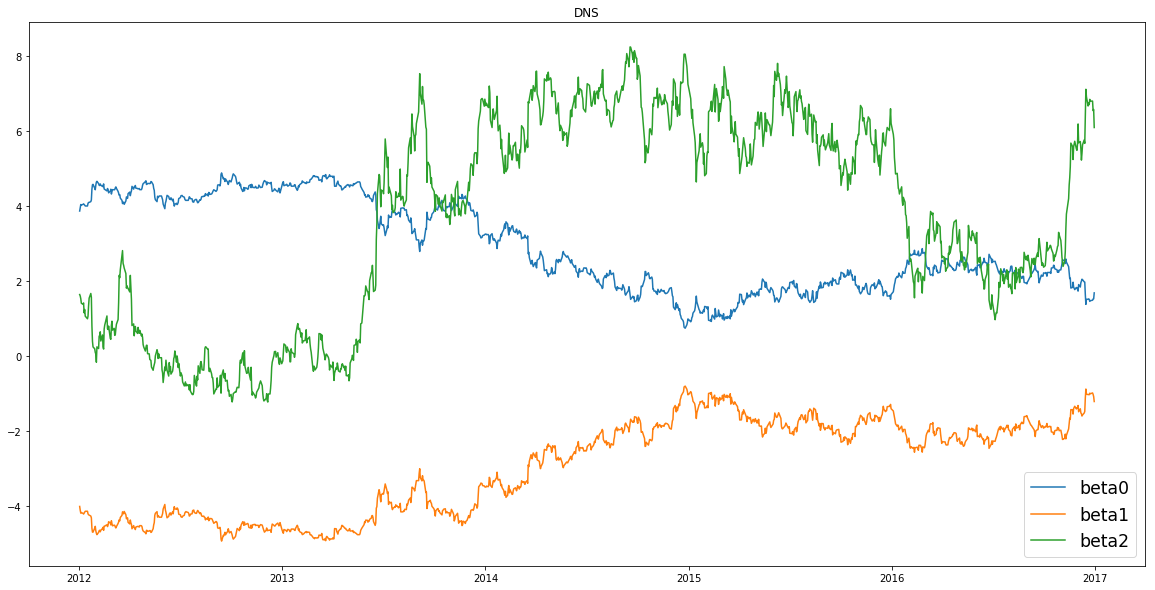

In [60]:
plt.figure(figsize=(20,10))
b0, = plt.plot(beta_matrix.iloc[:,0])
b1, = plt.plot(beta_matrix.iloc[:,1])
b2, = plt.plot(beta_matrix.iloc[:,2])
plt.legend(handles=[b0,b1,b2,], labels=['beta0','beta1','beta2'], 
           loc='lower right',fontsize='xx-large') 
plt.title('DNS')
plt.show()

### Step 2: Find lambda that best fits the whole dataset (Step1 needs to be repeated on each iteration as you search for optimal )

In [74]:
def cal_error(lamb):
    
    mat_vec = [1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]
    lamb_vec = [lamb for i in range(len(mat_vec))]
    beta, CMT_model = DNS(CMT_sample1, mat_vec, lamb_vec)
    CMT_model_matrix = pd.DataFrame(CMT_model, index=CMT_sample1.index, columns=CMT_sample1.columns)
    return sum(sum(((CMT_model_matrix - CMT_sample1)**2).values))

In [75]:
from scipy.optimize import minimize

res = minimize(cal_error, 0.1,method='L-BFGS-B')
print ("Optimize Lambda is:",res.x)
print ("Optimization condition:",res.success)

Optimize Lambda is: [0.45161825]
Optimization condition: True


# Problem 2

### Step 1: Compute RMSE for each day in the sample and pick 20 days with largest RMSE

In [181]:
best_lambda = float(res.x)
lamb_vec = [best_lambda for i in range(len(mat_vec))]

beta, CMT_model = DNS(CMT_sample1, mat_vec, lamb_vec)
beta_matrix = pd.DataFrame(beta, index=CMT_sample1.index, columns=['beta0','beta1','beta2'])
CMT_model_matrix = pd.DataFrame(CMT_model, index=CMT_sample1.index, columns=CMT_sample1.columns)
RMSE = (((CMT_model_matrix - CMT_sample1)**2).mean(1))**0.5
RMSE_matrix = pd.DataFrame(RMSE, columns=['RMSE'])
print ('20 largest RMSE: ')
RMSE_matrix.sort_values(by='RMSE', ascending=False).head(20)

20 largest RMSE: 


,RMSE
Date,
2013-12-31,0.128874
2013-12-24,0.124393
2013-12-27,0.123914
2014-01-02,0.123037
2013-12-30,0.121749
2014-04-24,0.121183
2014-04-21,0.121135
2014-04-17,0.120017
2014-04-22,0.119492


### Step 2: Use 6m of data prior to each of the 20 days to fit AR(1) to each of 1(t); 2(t); 3(t) time series and compute half-lives (HL). Generate t+5d. t+10d, t+1m forecast for each of the 20 days, using the corresponding model for each forecast. Total of 3 forecasts for each of the 20 days

In [122]:
top20 = RMSE_matrix.sort_values(by='RMSE', ascending=False).iloc[0:20,:]

In [178]:
def find_Nmonths_dataset(data, date, Nmonths=6):
    date_previous = date - pd.Timedelta(days=30*Nmonths)
    Nmonths_dataset = data.loc[str(date_previous):str(date)]
    
    #index = list(data.index).index(date)
    #index_previous = index-Ndays+1
    #Nmonths_dataset = data.loc[data.index[index_previous]:data.index[index]]
    return Nmonths_dataset

In [251]:
from statsmodels.tsa.arima_model import ARMA
import math

def AR1_hl_forecast(data, date, past_months, forecast_days): # AR(1) and forecast, half-life
    beta_6months = find_Nmonths_dataset(data, date, Nmonths=past_months)
    
    date_index = list(data.index).index(date)
    forecast_index = data.index[date_index+1:date_index+1+forecast_days]
    forecast_matrix = pd.DataFrame(index=forecast_index, columns=data.columns)
    halflife_matrix = pd.DataFrame(index=[date], columns=data.columns)
    
    for i in range(data.shape[1]):
        model = ARMA(beta_6months.iloc[:,i],(1,0)).fit()
        forecast = model.forecast(forecast_days)[0]
        forecast_matrix[data.columns[i]] = forecast
        
        halflife_matrix.iloc[0,i] = -math.log(2)/math.log(model.arparams)
    
    return forecast_matrix, halflife_matrix

In [258]:
#t+5d forecast
for date in top20.index:
    forecast_matrix, halflife_matrix = AR1_hl_forecast(beta_matrix, date, 6, 5)
    
    print ('\n5 days beta forecast'+str(date)+'\n')
    print (forecast_matrix)
    print ('\nhalf-life'+str(date)+'\n')
    print (halflife_matrix)
    print ('===========================================')

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar


5 days beta forecast2013-12-31 00:00:00

               beta0     beta1     beta2
Date                                    
2014-01-02  4.747905 -4.796407 -4.080564
2014-01-03  4.732376 -4.778074 -4.086236
2014-01-06  4.717851 -4.760925 -4.091681
2014-01-07  4.704266 -4.744881 -4.096908
2014-01-08  4.691561 -4.729872 -4.101926

half-life2013-12-31 00:00:00

             beta0    beta1   beta2
2013-12-31  10.361  10.3949  16.965

5 days beta forecast2013-12-24 00:00:00

               beta0     beta1     beta2
Date                                    
2013-12-26  4.667482 -4.718820 -3.945347
2013-12-27  4.655608 -4.703025 -3.958841
2013-12-30  4.644424 -4.688197 -3.971740
2013-12-31  4.633892 -4.674278 -3.984069
2014-01-02  4.623972 -4.661211 -3.995854

half-life2013-12-24 00:00:00

            beta0    beta1    beta2
2013-12-24  11.56  10.9675  15.3563

5 days beta forecast2013-12-27 00:00:00

               beta0     beta1     beta2
Date                                    
2013-12-30  

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: inval


5 days beta forecast2014-04-24 00:00:00

               beta0     beta1     beta2
Date                                    
2014-04-25  4.069592 -4.214897 -2.649739
2014-04-28  4.076098 -4.223044 -2.660465
2014-04-29  4.082445 -4.230838 -2.671082
2014-04-30  4.088637 -4.238295 -2.681591
2014-05-01  4.094678 -4.245429 -2.691994

half-life2014-04-24 00:00:00

              beta0    beta1    beta2
2014-04-24  28.0243  15.6684  67.9629

5 days beta forecast2014-04-21 00:00:00

               beta0     beta1     beta2
Date                                    
2014-04-22  4.146939 -4.260023 -2.848188
2014-04-23  4.152896 -4.266695 -2.860067
2014-04-24  4.158685 -4.273067 -2.871797
2014-04-25  4.164310 -4.279152 -2.883380
2014-04-28  4.169775 -4.284964 -2.894817

half-life2014-04-21 00:00:00

             beta0    beta1  beta2
2014-04-21  24.088  15.0691  54.77

5 days beta forecast2014-04-17 00:00:00

               beta0     beta1     beta2
Date                                    
2014-04-21

In [259]:
#t+10d forecast
for date in top20.index:
    forecast_matrix, halflife_matrix = AR1_hl_forecast(beta_matrix, date, 6, 10)
    
    print ('\n10 days beta forecast'+str(date)+'\n')
    print (forecast_matrix)
    print ('\nhalf-life'+str(date)+'\n')
    print (halflife_matrix)
    print ('===========================================')

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar


10 days beta forecast2013-12-31 00:00:00

               beta0     beta1     beta2
Date                                    
2014-01-02  4.747905 -4.796407 -4.080564
2014-01-03  4.732376 -4.778074 -4.086236
2014-01-06  4.717851 -4.760925 -4.091681
2014-01-07  4.704266 -4.744881 -4.096908
2014-01-08  4.691561 -4.729872 -4.101926
2014-01-09  4.679677 -4.715832 -4.106743
2014-01-10  4.668563 -4.702697 -4.111367
2014-01-13  4.658168 -4.690410 -4.115806
2014-01-14  4.648445 -4.678915 -4.120068
2014-01-15  4.639352 -4.668162 -4.124158

half-life2013-12-31 00:00:00

             beta0    beta1   beta2
2013-12-31  10.361  10.3949  16.965

10 days beta forecast2013-12-24 00:00:00

               beta0     beta1     beta2
Date                                    
2013-12-26  4.667482 -4.718820 -3.945347
2013-12-27  4.655608 -4.703025 -3.958841
2013-12-30  4.644424 -4.688197 -3.971740
2013-12-31  4.633892 -4.674278 -3.984069
2014-01-02  4.623972 -4.661211 -3.995854
2014-01-03  4.614630 -4.648944 -

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: inval


10 days beta forecast2014-04-24 00:00:00

               beta0     beta1     beta2
Date                                    
2014-04-25  4.069592 -4.214897 -2.649739
2014-04-28  4.076098 -4.223044 -2.660465
2014-04-29  4.082445 -4.230838 -2.671082
2014-04-30  4.088637 -4.238295 -2.681591
2014-05-01  4.094678 -4.245429 -2.691994
2014-05-02  4.100571 -4.252254 -2.702291
2014-05-05  4.106321 -4.258784 -2.712484
2014-05-06  4.111929 -4.265032 -2.722574
2014-05-07  4.117401 -4.271009 -2.732561
2014-05-08  4.122739 -4.276727 -2.742446

half-life2014-04-24 00:00:00

              beta0    beta1    beta2
2014-04-24  28.0243  15.6684  67.9629

10 days beta forecast2014-04-21 00:00:00

               beta0     beta1     beta2
Date                                    
2014-04-22  4.146939 -4.260023 -2.848188
2014-04-23  4.152896 -4.266695 -2.860067
2014-04-24  4.158685 -4.273067 -2.871797
2014-04-25  4.164310 -4.279152 -2.883380
2014-04-28  4.169775 -4.284964 -2.894817
2014-04-29  4.175085 -4.2905


10 days beta forecast2014-01-08 00:00:00

               beta0     beta1     beta2
Date                                    
2014-01-09  4.647459 -4.725901 -3.720311
2014-01-10  4.637696 -4.712394 -3.739630
2014-01-13  4.628604 -4.699733 -3.758210
2014-01-14  4.620137 -4.687867 -3.776078
2014-01-15  4.612251 -4.676744 -3.793262
2014-01-16  4.604907 -4.666320 -3.809788
2014-01-17  4.598067 -4.656549 -3.825681
2014-01-21  4.591697 -4.647391 -3.840966
2014-01-22  4.585765 -4.638808 -3.855666
2014-01-23  4.580240 -4.630762 -3.869802

half-life2014-01-08 00:00:00

              beta0    beta1    beta2
2014-01-08  9.74042  10.7013  17.7533


In [260]:
#t+1m forecast
for date in top20.index:
    forecast_matrix, halflife_matrix = AR1_hl_forecast(beta_matrix, date, 6, 30)
    
    print ('\n1 month beta forecast'+str(date)+'\n')
    print (forecast_matrix)
    print ('\nhalf-life'+str(date)+'\n')
    print (halflife_matrix)
    print ('===========================================')

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar


1 month beta forecast2013-12-31 00:00:00

               beta0     beta1     beta2
Date                                    
2014-01-02  4.747905 -4.796407 -4.080564
2014-01-03  4.732376 -4.778074 -4.086236
2014-01-06  4.717851 -4.760925 -4.091681
2014-01-07  4.704266 -4.744881 -4.096908
2014-01-08  4.691561 -4.729872 -4.101926
2014-01-09  4.679677 -4.715832 -4.106743
2014-01-10  4.668563 -4.702697 -4.111367
2014-01-13  4.658168 -4.690410 -4.115806
2014-01-14  4.648445 -4.678915 -4.120068
2014-01-15  4.639352 -4.668162 -4.124158
2014-01-16  4.630847 -4.658102 -4.128085
2014-01-17  4.622892 -4.648691 -4.131855
2014-01-21  4.615452 -4.639887 -4.135474
2014-01-22  4.608494 -4.631652 -4.138948
2014-01-23  4.601986 -4.623947 -4.142283
2014-01-24  4.595899 -4.616740 -4.145484
2014-01-27  4.590206 -4.609997 -4.148557
2014-01-28  4.584881 -4.603689 -4.151507
2014-01-29  4.579901 -4.597788 -4.154339
2014-01-30  4.575243 -4.592268 -4.157058
2014-01-31  4.570887 -4.587104 -4.159668
2014-02-03  4.

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: inval


1 month beta forecast2014-04-24 00:00:00

               beta0     beta1     beta2
Date                                    
2014-04-25  4.069592 -4.214897 -2.649739
2014-04-28  4.076098 -4.223044 -2.660465
2014-04-29  4.082445 -4.230838 -2.671082
2014-04-30  4.088637 -4.238295 -2.681591
2014-05-01  4.094678 -4.245429 -2.691994
2014-05-02  4.100571 -4.252254 -2.702291
2014-05-05  4.106321 -4.258784 -2.712484
2014-05-06  4.111929 -4.265032 -2.722574
2014-05-07  4.117401 -4.271009 -2.732561
2014-05-08  4.122739 -4.276727 -2.742446
2014-05-09  4.127947 -4.282198 -2.752232
2014-05-12  4.133028 -4.287433 -2.761918
2014-05-13  4.137984 -4.292440 -2.771505
2014-05-14  4.142819 -4.297232 -2.780996
2014-05-15  4.147536 -4.301815 -2.790390
2014-05-16  4.152138 -4.306201 -2.799689
2014-05-19  4.156628 -4.310396 -2.808893
2014-05-20  4.161008 -4.314410 -2.818004
2014-05-21  4.165280 -4.318251 -2.827023
2014-05-22  4.169449 -4.321925 -2.835950
2014-05-23  4.173516 -4.325440 -2.844787
2014-05-27  4.


1 month beta forecast2014-01-03 00:00:00

               beta0     beta1     beta2
Date                                    
2014-01-06  4.701809 -4.745091 -4.010463
2014-01-07  4.689030 -4.729796 -4.020171
2014-01-08  4.677069 -4.715475 -4.029468
2014-01-09  4.665873 -4.702064 -4.038370
2014-01-10  4.655392 -4.689507 -4.046895
2014-01-13  4.645582 -4.677749 -4.055059
2014-01-14  4.636398 -4.666739 -4.062876
2014-01-15  4.627802 -4.656430 -4.070362
2014-01-16  4.619755 -4.646776 -4.077531
2014-01-17  4.612223 -4.637737 -4.084395
2014-01-21  4.605173 -4.629273 -4.090968
2014-01-22  4.598573 -4.621348 -4.097263
2014-01-23  4.592395 -4.613927 -4.103291
2014-01-24  4.586612 -4.606978 -4.109063
2014-01-27  4.581198 -4.600471 -4.114590
2014-01-28  4.576131 -4.594379 -4.119883
2014-01-29  4.571388 -4.588673 -4.124952
2014-01-30  4.566948 -4.583331 -4.129805
2014-01-31  4.562792 -4.578329 -4.134453
2014-02-03  4.558902 -4.573646 -4.138904
2014-02-04  4.555260 -4.569260 -4.143166
2014-02-05  4.


1 month beta forecast2014-04-29 00:00:00

               beta0     beta1     beta2
Date                                    
2014-04-30  4.106830 -4.231390 -2.755590
2014-05-01  4.113075 -4.239363 -2.766040
2014-05-02  4.119159 -4.246981 -2.776380
2014-05-05  4.125088 -4.254259 -2.786611
2014-05-06  4.130864 -4.261212 -2.796734
2014-05-07  4.136491 -4.267856 -2.806750
2014-05-08  4.141974 -4.274203 -2.816660
2014-05-09  4.147317 -4.280267 -2.826466
2014-05-12  4.152522 -4.286061 -2.836169
2014-05-13  4.157593 -4.291597 -2.845769
2014-05-14  4.162534 -4.296885 -2.855268
2014-05-15  4.167348 -4.301938 -2.864667
2014-05-16  4.172039 -4.306765 -2.873966
2014-05-19  4.176609 -4.311378 -2.883168
2014-05-20  4.181062 -4.315784 -2.892272
2014-05-21  4.185400 -4.319994 -2.901281
2014-05-22  4.189627 -4.324016 -2.910194
2014-05-23  4.193746 -4.327859 -2.919013
2014-05-27  4.197758 -4.331531 -2.927740
2014-05-28  4.201668 -4.335039 -2.936374
2014-05-29  4.205477 -4.338390 -2.944917
2014-05-30  4.

### Step 3. Do these forecasts perform better than those generated under a random walk assumption?

In [306]:
# the forecast of a random walk is itself, since the expectation of increment is 0

#t+5d forecast
for date in top20.index:
    forecast_matrix5,_ = AR1_hl_forecast(beta_matrix, date, 6, 5)
    real_matrix5 = beta_matrix.loc[date+pd.Timedelta(days=1):date+pd.Timedelta(days=5+2)]
    error_forecast5 = sum(((forecast_matrix5-real_matrix5)**2).sum())
    
    forecast_RW_matrix5 = pd.DataFrame(index=forecast_matrix5.index, columns=forecast_matrix5.columns)
    forecast_RW_matrix5[forecast_RW_matrix5.columns] = list(beta_matrix.loc[date])
    error_RW5 = sum(((forecast_RW_matrix5-real_matrix5)**2).sum())
    
    print ('Comparison of'+str(date))
    print ('Error of AR(1) forecast: '+str(error_forecast5))
    print ('Error of Random Walk forecast: '+str(error_RW5))
    print ('==============================================\n')

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

Comparison of2013-12-31 00:00:00
Error of AR(1) forecast: 0.051973034584067435
Error of Random Walk forecast: 0.08011885550638445

Comparison of2013-12-24 00:00:00
Error of AR(1) forecast: 0.0708532480987007
Error of Random Walk forecast: 0.05463625925968429

Comparison of2013-12-27 00:00:00
Error of AR(1) forecast: 0.017779344756069307
Error of Random Walk forecast: 0.015763728199485932

Comparison of2014-01-02 00:00:00
Error of AR(1) forecast: 0.37062756502090255
Error of Random Walk forecast: 0.32921349676436196

Comparison of2013-12-30 00:00:00
Error of AR(1) forecast: 0.047729437976336955
Error of Random Walk forecast: 0.021360964577514567



/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: inval

Comparison of2014-04-24 00:00:00
Error of AR(1) forecast: 0.08743549720239638
Error of Random Walk forecast: 0.11584406884650603

Comparison of2014-04-21 00:00:00
Error of AR(1) forecast: 0.24190064271096215
Error of Random Walk forecast: 0.15352331152454057

Comparison of2014-04-17 00:00:00
Error of AR(1) forecast: 0.11429865024459133
Error of Random Walk forecast: 0.06468686952971428

Comparison of2014-04-22 00:00:00
Error of AR(1) forecast: 0.03434497247842315
Error of Random Walk forecast: 0.017620134438140353

Comparison of2014-04-03 00:00:00
Error of AR(1) forecast: 0.5045161766744921
Error of Random Walk forecast: 0.600086561456679

Comparison of2014-04-25 00:00:00
Error of AR(1) forecast: 0.0986069012946435
Error of Random Walk forecast: 0.09203323359985555

Comparison of2014-01-03 00:00:00
Error of AR(1) forecast: 0.30355767790245325
Error of Random Walk forecast: 0.30089414287970867

Comparison of2014-04-23 00:00:00
Error of AR(1) forecast: 0.02808552165202767
Error of Random

In [307]:
#t+10d forecast
for date in top20.index:
    forecast_matrix10,_ = AR1_hl_forecast(beta_matrix, date, 6, 10)
    real_matrix10 = beta_matrix.loc[date+pd.Timedelta(days=1):date+pd.Timedelta(days=10+2)]
    error_forecast10 = sum(((forecast_matrix10-real_matrix10)**2).sum())
    
    forecast_RW_matrix10 = pd.DataFrame(index=forecast_matrix10.index, columns=forecast_matrix10.columns)
    forecast_RW_matrix10[forecast_RW_matrix10.columns] = list(beta_matrix.loc[date])
    error_RW10 = sum(((forecast_RW_matrix10-real_matrix10)**2).sum())
    
    print ('Comparison of'+str(date))
    print ('Error of AR(1) forecast: '+str(error_forecast10))
    print ('Error of Random Walk forecast: '+str(error_RW10))
    print ('==============================================\n')

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

Comparison of2013-12-31 00:00:00
Error of AR(1) forecast: 0.48509208729204845
Error of Random Walk forecast: 0.5698447866236618

Comparison of2013-12-24 00:00:00
Error of AR(1) forecast: 0.11590562410796595
Error of Random Walk forecast: 0.07928743256537793

Comparison of2013-12-27 00:00:00
Error of AR(1) forecast: 0.17791277114233403
Error of Random Walk forecast: 0.14353591528986914

Comparison of2014-01-02 00:00:00
Error of AR(1) forecast: 0.5682793140303183
Error of Random Walk forecast: 0.6085880210038348

Comparison of2013-12-30 00:00:00
Error of AR(1) forecast: 0.419192658232541
Error of Random Walk forecast: 0.3163290248429403



/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: inval

Comparison of2014-04-24 00:00:00
Error of AR(1) forecast: 0.26078082557355253
Error of Random Walk forecast: 0.19860904154092834

Comparison of2014-04-21 00:00:00
Error of AR(1) forecast: 0.5877924255398969
Error of Random Walk forecast: 0.32191259773177305

Comparison of2014-04-17 00:00:00
Error of AR(1) forecast: 0.25537817973297383
Error of Random Walk forecast: 0.1128295084399795

Comparison of2014-04-22 00:00:00
Error of AR(1) forecast: 0.2114686003720787
Error of Random Walk forecast: 0.14080099801992382

Comparison of2014-04-03 00:00:00
Error of AR(1) forecast: 0.9604727575400068
Error of Random Walk forecast: 1.1110634522916292

Comparison of2014-04-25 00:00:00
Error of AR(1) forecast: 0.22606991251298514
Error of Random Walk forecast: 0.1437571710556465

Comparison of2014-01-03 00:00:00
Error of AR(1) forecast: 0.5228316472969107
Error of Random Walk forecast: 0.5829457724815841

Comparison of2014-04-23 00:00:00
Error of AR(1) forecast: 0.19191530204481802
Error of Random Walk

In [308]:
#t+1m forecast
for date in top20.index:
    forecast_matrix30,_ = AR1_hl_forecast(beta_matrix, date, 6, 30)
    real_matrix30 = beta_matrix.loc[date+pd.Timedelta(days=1):date+pd.Timedelta(days=30+2)]
    error_forecast30 = sum(((forecast_matrix30-real_matrix30)**2).sum())
    
    forecast_RW_matrix30 = pd.DataFrame(index=forecast_matrix30.index, columns=forecast_matrix30.columns)
    forecast_RW_matrix30[forecast_RW_matrix30.columns] = list(beta_matrix.loc[date])
    error_RW30 = sum(((forecast_RW_matrix30-real_matrix30)**2).sum())
    
    print ('Comparison of'+str(date))
    print ('Error of AR(1) forecast: '+str(error_forecast30))
    print ('Error of Random Walk forecast: '+str(error_RW30))
    print ('==============================================\n')

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

Comparison of2013-12-31 00:00:00
Error of AR(1) forecast: 3.4029002998076554
Error of Random Walk forecast: 5.327708917091666

Comparison of2013-12-24 00:00:00
Error of AR(1) forecast: 1.9109471138055358
Error of Random Walk forecast: 1.5741100387926603

Comparison of2013-12-27 00:00:00
Error of AR(1) forecast: 2.44767356612223
Error of Random Walk forecast: 3.04321572024131

Comparison of2014-01-02 00:00:00
Error of AR(1) forecast: 3.417959405943205
Error of Random Walk forecast: 4.5901784025532

Comparison of2013-12-30 00:00:00
Error of AR(1) forecast: 2.7619992187481
Error of Random Walk forecast: 3.325706150824228



/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: inval

Comparison of2014-04-24 00:00:00
Error of AR(1) forecast: 2.2284010081884453
Error of Random Walk forecast: 2.8780582203998697

Comparison of2014-04-21 00:00:00
Error of AR(1) forecast: 2.7189137799885064
Error of Random Walk forecast: 1.9872541267918504

Comparison of2014-04-17 00:00:00
Error of AR(1) forecast: 2.2881167703137764
Error of Random Walk forecast: 1.258013234455752

Comparison of2014-04-22 00:00:00
Error of AR(1) forecast: 2.264354637486034
Error of Random Walk forecast: 2.55004542609371

Comparison of2014-04-03 00:00:00
Error of AR(1) forecast: 4.180384829365099
Error of Random Walk forecast: 2.462511964170643

Comparison of2014-04-25 00:00:00
Error of AR(1) forecast: 1.8548462422983805
Error of Random Walk forecast: 2.413283942569002

Comparison of2014-01-03 00:00:00
Error of AR(1) forecast: 3.066174404902359
Error of Random Walk forecast: 4.473653207647346

Comparison of2014-04-23 00:00:00
Error of AR(1) forecast: 1.7959835698071556
Error of Random Walk forecast: 2.083

Conclusion:
In most circumstances:
- For short period forecast like 5d and 10d, random walk performs better than AR model.
- For long term forecast like 1m, AR performs slightly better than random walk.